<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/03_CORRELA%C3%87%C3%83O_entre_D%C3%93LAR_e_IBOVESPA_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ricos pelo Acaso



Link para o vídeo: https://youtu.be/zjaGIcUb6Ek

# 1. Importando bibliotecas

In [2]:
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Seaborn é uma biblioteca usada principalmente para plotagem estatística em  Python. 
# Construída em cima do Matplotlib
#!pip install --upgrade seaborn
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Obtendo e tratando os dados

In [78]:
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [79]:
carteira

Ticker,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.0000
2007-01-03,2.1345,44445.0000
2007-01-04,2.1390,44020.0000
2007-01-05,2.1470,42245.0000
...,...,...
2025-05-20,5.6445,140110.0000
2025-05-21,5.6673,137881.0000
2025-05-22,5.6447,137273.0000


In [80]:
# A função pandas.DataFrame.dropna() remove os valores nulos (valores ausentes, Nan, Nat) do DataFrame, 
#retirando as linhas ou colunas que contêm os valores nulos.
carteira = carteira.dropna()
carteira

Ticker,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.0000
2007-01-03,2.1345,44445.0000
2007-01-04,2.1390,44020.0000
2007-01-05,2.1470,42245.0000
2007-01-08,2.1465,42830.0000
...,...,...
2025-05-20,5.6445,140110.0000
2025-05-21,5.6673,137881.0000
2025-05-22,5.6447,137273.0000


In [81]:
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.1310,45383.0000
2007-01-03,2.1345,44445.0000
2007-01-04,2.1390,44020.0000
2007-01-05,2.1470,42245.0000
2007-01-08,2.1465,42830.0000
...,...,...
2025-05-20,5.6445,140110.0000
2025-05-21,5.6673,137881.0000
2025-05-22,5.6447,137273.0000


# 3. Resultados

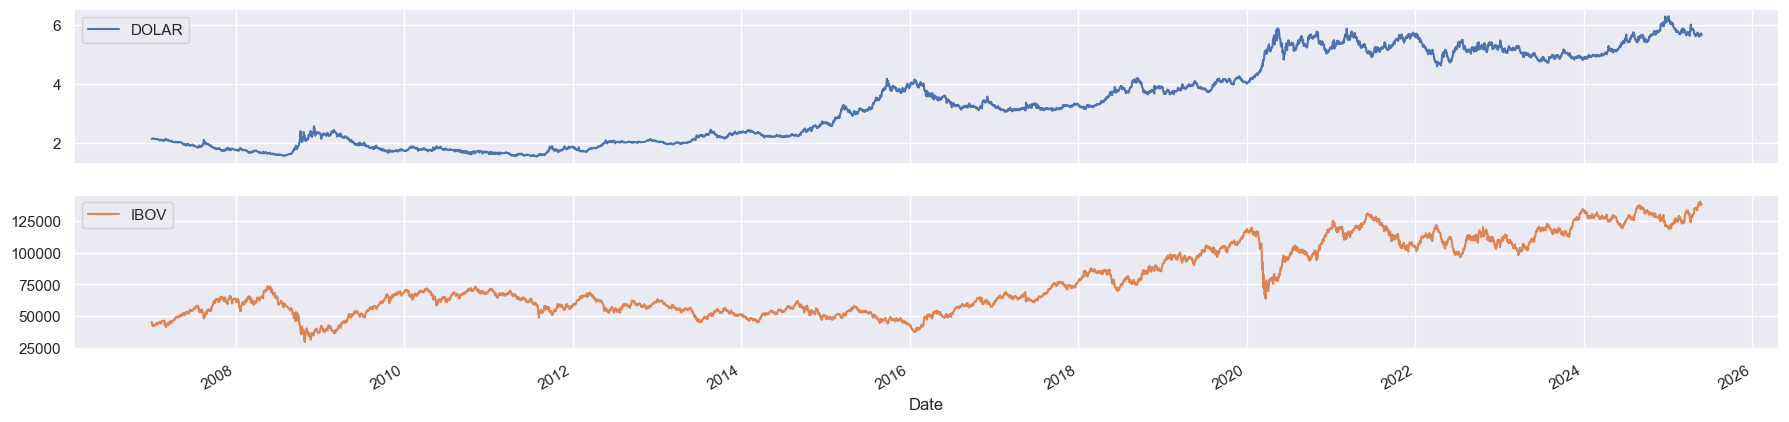

In [83]:
sns.set()
carteira.plot(subplots=True, figsize=(22,5));

In [84]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2007-01-03,0.001642,-0.020669
2007-01-04,0.002108,-0.009562
2007-01-05,0.003740,-0.040323
2007-01-08,-0.000233,0.013848
2007-01-09,0.001165,-0.019216
...,...,...
2025-05-20,-0.002505,0.003395
2025-05-21,0.004039,-0.015909
2025-05-22,-0.003988,-0.004410


In [89]:
retornos.describe()

,DOLAR,IBOV
count,4521.000000,4521.000000
mean,0.000285,0.000387
std,0.011682,0.016780
min,-0.104792,-0.147797
25%,-0.005978,-0.007993
50%,0.000058,0.000553
75%,0.006267,0.008995
max,0.101524,0.146560


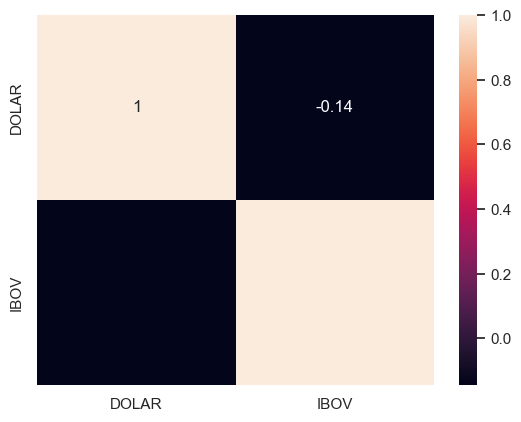

In [90]:
sns.heatmap(retornos.corr(), annot=True);

<Axes: xlabel='Date'>

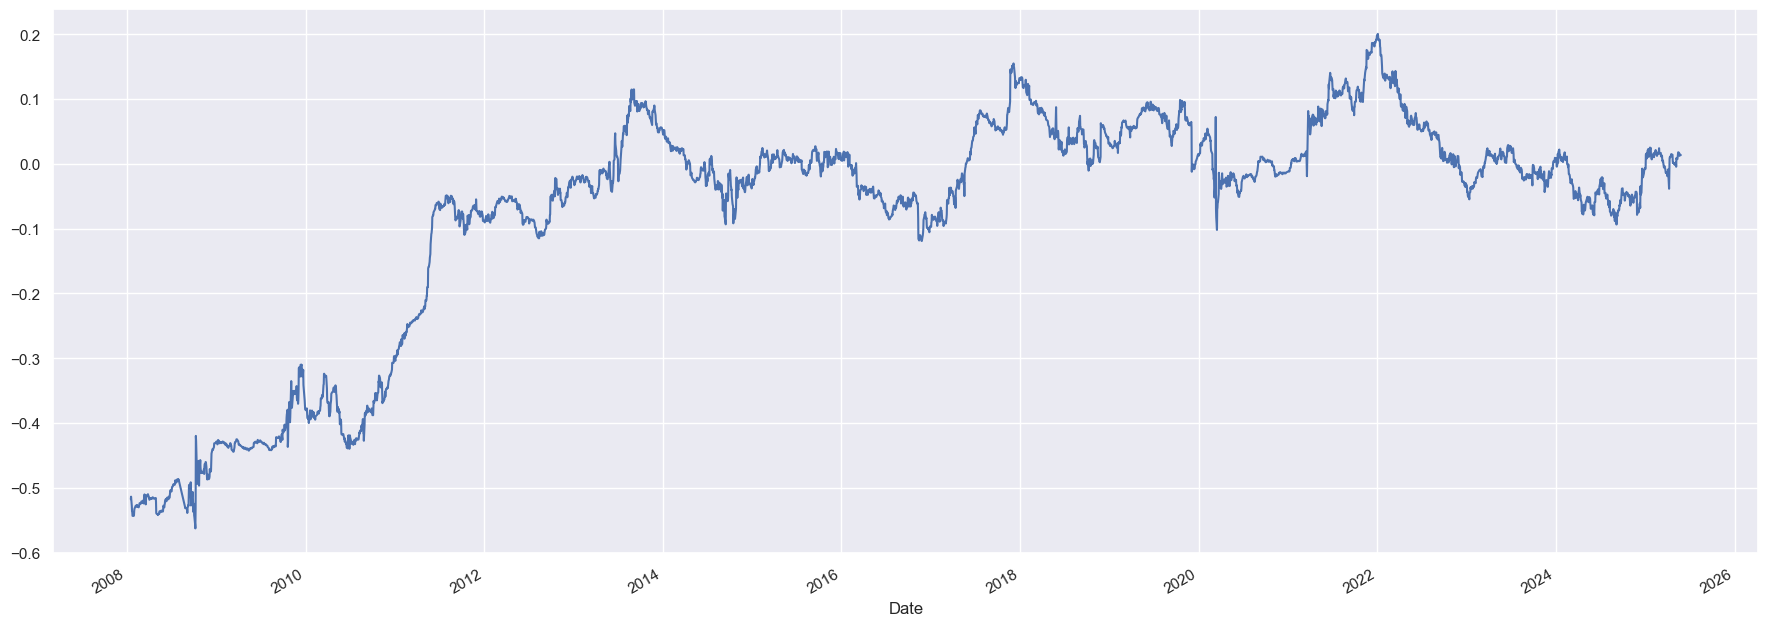

In [91]:
retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8))

In [92]:
carteira.loc[:, "IBOV_DOLARIZADO"] = carteira["IBOV"] / carteira["DOLAR"]
carteira

C:\Users\carlo\AppData\Local\Temp\ipykernel_12316\2430176852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carteira.loc[:, "IBOV_DOLARIZADO"] = carteira["IBOV"] / carteira["DOLAR"]


,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.1310,45383.0000,21296.573959
2007-01-03,2.1345,44445.0000,20822.206345
2007-01-04,2.1390,44020.0000,20579.710732
2007-01-05,2.1470,42245.0000,19676.291819
2007-01-08,2.1465,42830.0000,19953.411504
...,...,...,...
2025-05-20,5.6445,140110.0000,24822.394453
2025-05-21,5.6673,137881.0000,24329.221065
2025-05-22,5.6447,137273.0000,24318.918415


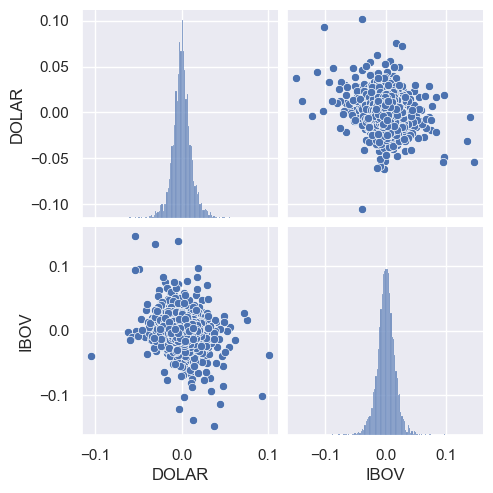

In [93]:
# Substituir valores infinitos por NaN
retornos.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.pairplot(retornos);

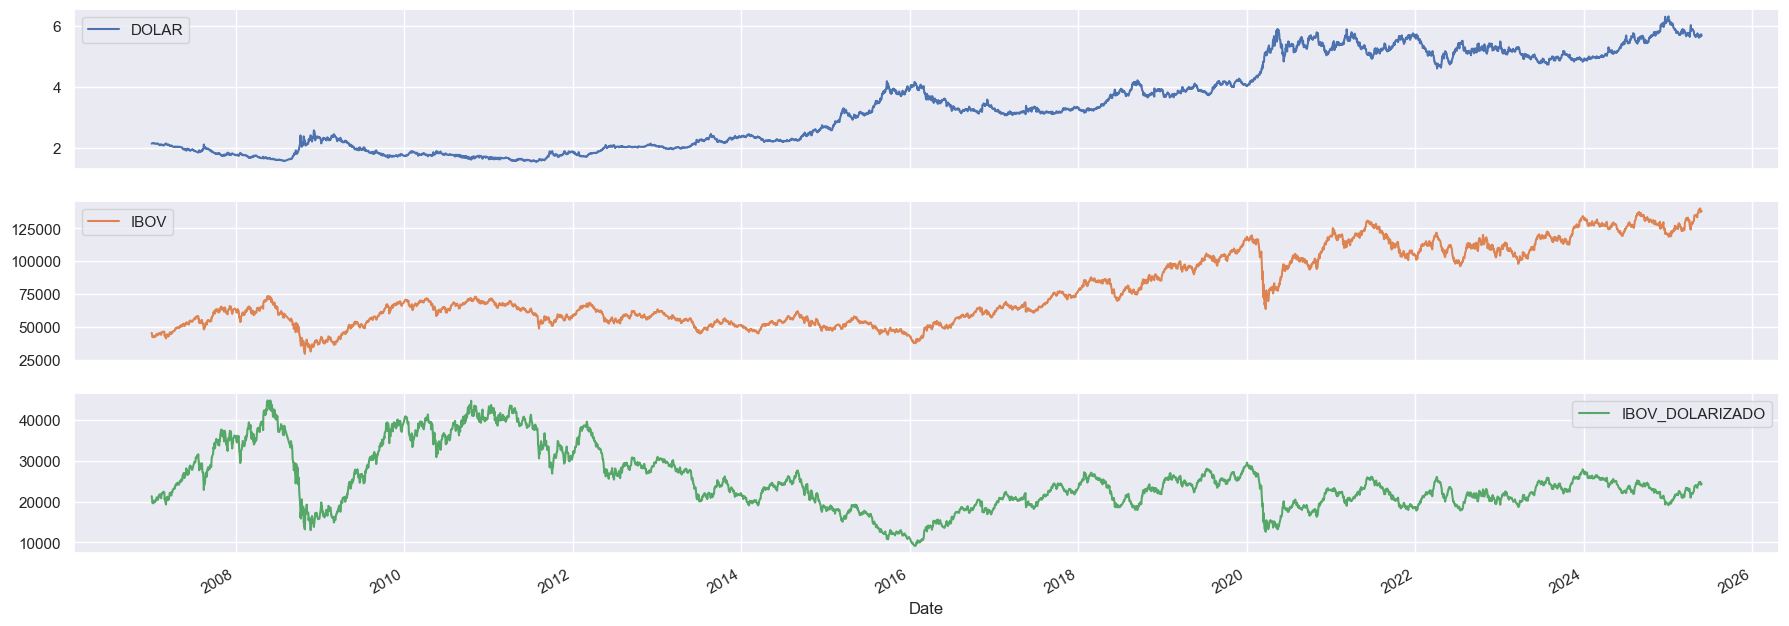

In [94]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));